In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

### Image Histograms

So what is histogram ? You can consider histogram as a graph or plot, which gives you an overall idea about the intensity distribution of an image. It is a plot with pixel values (ranging from 0 to 255, not always) in X-axis and corresponding number of pixels in the image on Y-axis.

It is just another way of understanding the image. By looking at the histogram of an image, you get intuition about contrast, brightness, intensity distribution etc of that image. Almost all image processing tools today, provides features on histogram. Below is an image from Cambridge in Color website, and I recommend you to visit the site for more details.

(<matplotlib.image.AxesImage at 0x145a4e610>, Text(0.5, 1.0, 'Original'))

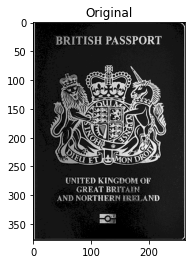

In [35]:
img = cv.imread('../Images/british_passport.png',0)
plt.imshow(img,cmap = 'gray'), plt.title('Original')

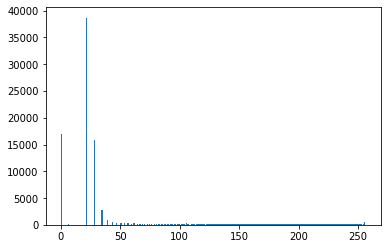

In [36]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

(<matplotlib.image.AxesImage at 0x1465d2c50>, Text(0.5, 1.0, 'Original'))

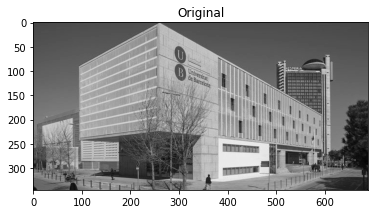

In [38]:
img = cv.imread('../Images/university_barcelona.jpeg',0)
plt.imshow(img,cmap = 'gray'), plt.title('Original')

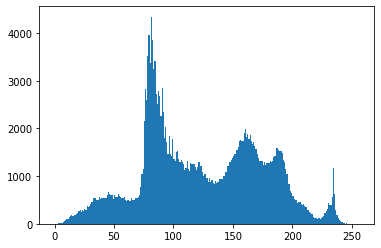

In [39]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

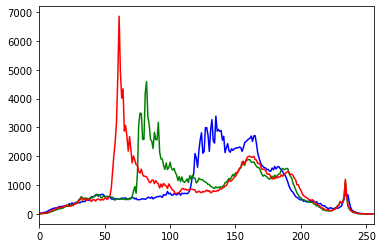

In [40]:
img = cv.imread('../Images/university_barcelona.jpeg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

We will learn the concepts of histogram equalization and use it to improve the contrast of our images. Consider an image whose pixel values are confined to some specific range of values only. For eg, brighter image will have all pixels confined to high values. But a good image will have pixels from all regions of the image. So you need to stretch this histogram to either ends (as given in below image, from wikipedia) and that is what Histogram Equalization does (in simple words). This normally improves the contrast of the image.


(<matplotlib.image.AxesImage at 0x145ae61d0>, Text(0.5, 1.0, 'Original'))

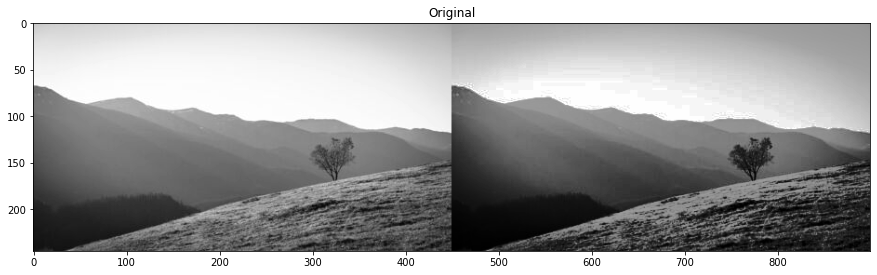

In [43]:
img = cv.imread('../Images/hills_greyscale.jpg',0)
equ = cv.equalizeHist(img)
res = np.hstack((img,equ))

fig = plt.figure(figsize=(15, 15))
plt.imshow(res,cmap = 'gray'), plt.title('Original')

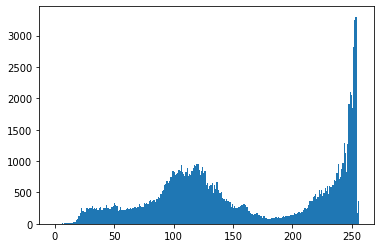

In [44]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

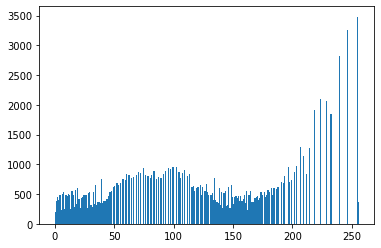

In [45]:
plt.hist(equ.ravel(),256,[0,256]); plt.show()

### Image Smoothing

The objective of learning low pass filters is to exploit the knowledge to-
* Blur images with various low pass filters: Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noise. It actually removes high frequency content (eg: noise, edges) from the image. So edges are blurred a little bit in this operation (there are also blurring techniques which don't blur the edges). OpenCV provides four main types of blurring techniques.
* Apply custom-made filters to images (2D convolution)

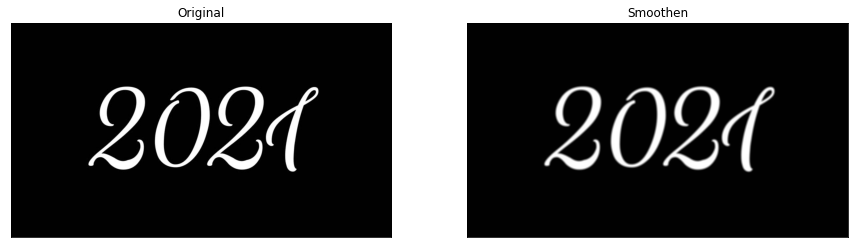

In [86]:
img = cv.imread('../Images/2021.jpg')
kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(img,-1,kernel)

fig = plt.figure(figsize=(15, 15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Smoothen')
plt.xticks([]), plt.yticks([])
plt.show()

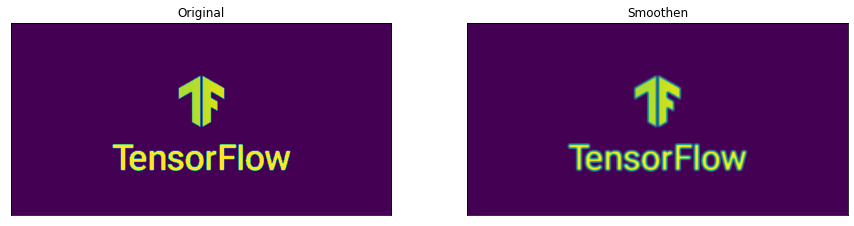

In [55]:
img = cv.imread('../Images/tensorflow_image.png', 0)
kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(img,-1,kernel)

fig = plt.figure(figsize=(15, 15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Smoothen')
plt.xticks([]), plt.yticks([])
plt.show()

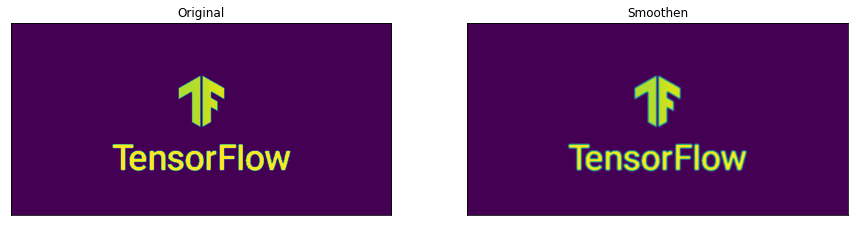

In [59]:
blur = cv.GaussianBlur(img,(5,5),0)

fig = plt.figure(figsize=(15, 15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Smoothen')
plt.xticks([]), plt.yticks([])
plt.show()

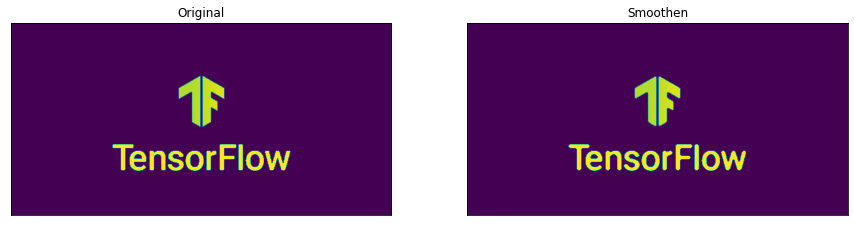

In [69]:
median = cv.medianBlur(img,5)

fig = plt.figure(figsize=(15, 15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Smoothen')
plt.xticks([]), plt.yticks([])
plt.show()

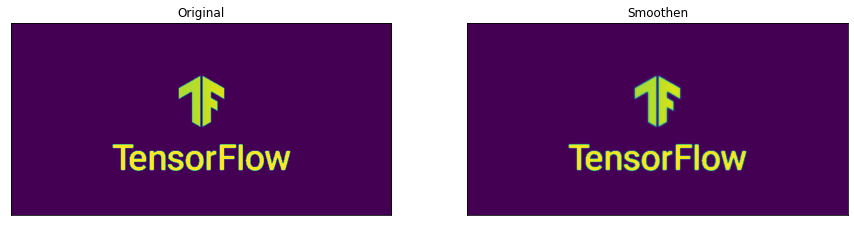

In [70]:
blur = cv.bilateralFilter(img,9,75,75)

fig = plt.figure(figsize=(15, 15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Smoothen')
plt.xticks([]), plt.yticks([])
plt.show()

### Template Matching

([], <matplotlib.image.AxesImage at 0x1459e8cd0>, Text(0.5, 1.0, 'Original'))

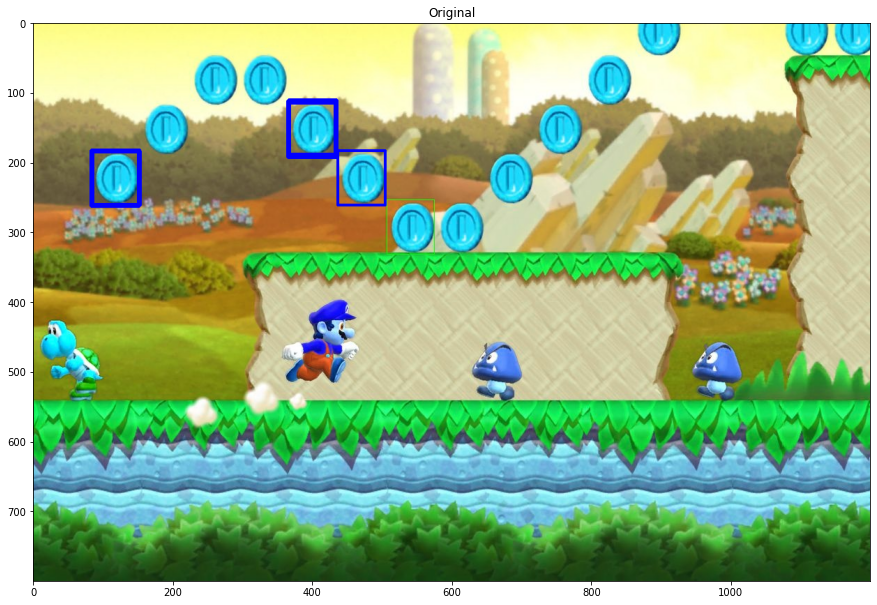

In [85]:
img_rgb = cv.imread('../Images/mario_snapshot.jpeg')
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('../Images/mario_coin.jpeg',0)
w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    
fig = plt.figure(figsize=(15, 15))
plt.plot(),plt.imshow(img_rgb),plt.title('Original')

### Image Transformations

While doing image transformations, our objective is to learn to apply different geometric transformations to images, like translation, rotation, affine transformation etc.

Scaling is just resizing of the image. OpenCV comes with a function cv.resize() for this purpose. The size of the image can be specified manually, or you can specify the scaling factor. Different interpolation methods are used. 

Preferable interpolation methods are cv.INTER_AREA for shrinking and cv.INTER_CUBIC (slow) & cv.INTER_LINEAR for zooming. By default, the interpolation method cv.INTER_LINEAR is used for all resizing purposes. 

You can resize an input image with either of following methods:

(<AxesSubplot:title={'center':'Result'}>,
 Text(0.5, 1.0, 'Result'))

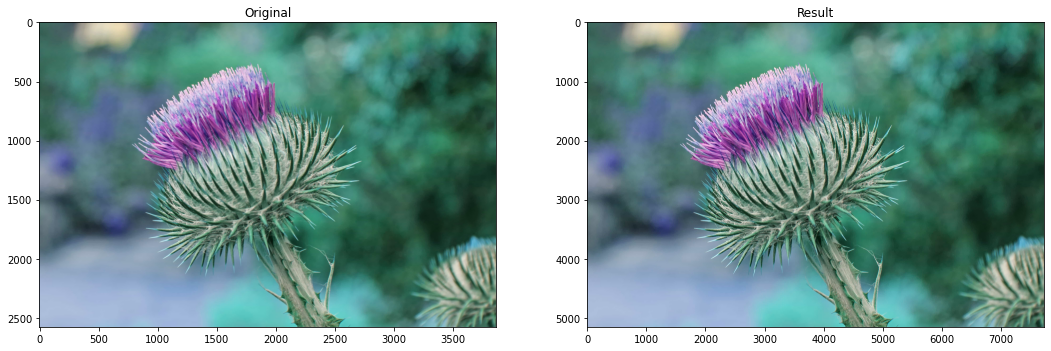

In [72]:
img = cv.imread('../Images/flower-sharp.jpeg')
result_1 = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)

height, width = img.shape[:2]
result_2 = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC)

plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray'), plt.title('Original')
plt.subplot(1,2,2),plt.imshow(result_1,cmap = 'gray'), plt.title('Result')
#plt.subplot(3,1,3),plt.imshow(result_2,cmap = 'gray'), plt.title('Laplacian')

### Rotations
Rotation of an image for an angle $\theta$ is achieved by the transformation matrix of the form-

$M = \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta \end{bmatrix}$

But OpenCV provides scaled rotation with adjustable center of rotation so that you can rotate at any location you prefer. The modified transformation matrix is given by

$\begin{bmatrix} \alpha & \beta & (1- \alpha ) \cdot center.x - \beta \cdot center.y \\ - \beta & \alpha & \beta \cdot center.x + (1- \alpha ) \cdot center.y \end{bmatrix}$

where:

$\begin{array}{l} \alpha = scale \cdot \cos \theta , \\ \beta = scale \cdot \sin \theta \end{array}$

(<AxesSubplot:title={'center':'Original'}>,
 Text(0.5, 1.0, 'Original'))

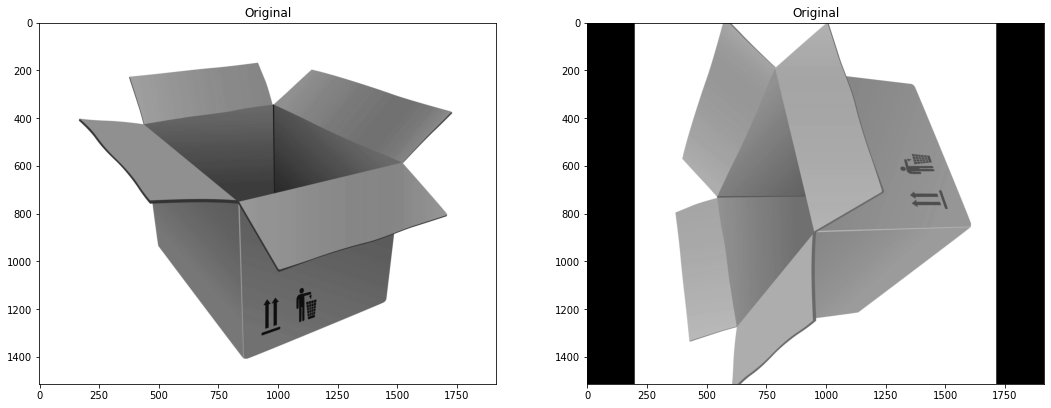

In [76]:
img = cv.imread('../Images/box_image.jpg',0)
rows,cols = img.shape
# cols-1 and rows-1 are the coordinate limits.
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst = cv.warpAffine(img,M,(cols,rows))

plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray'), plt.title('Original')
plt.subplot(1,2,2),plt.imshow(dst,cmap = 'gray'), plt.title('Original')

### Image Gradients (High Pass Filters)

The goal of high pass filters is to enable us to detect edges in the images.

Gradient filters


There are three common types of `Gradient filter` or `High-pass filter`, Sobel, Scharr and Laplacian. We will see each one of them.

1. **Laplacian**: It calculates the Laplacian of the image given by the relation,  $\Delta src = \frac{\partial ^2{src}}{\partial x^2} + \frac{\partial ^2{src}}{\partial y^2}$, where each derivative is found using Sobel derivatives. If ksize = 1, then following kernel is used for filtering: 
$kernel = \begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0 \end{bmatrix}$

2. **Sobel** and **Scharr**: Sobel operators is a joint Gausssian smoothing plus differentiation operation, so it is more resistant to noise. You can specify the direction of derivatives to be taken, vertical or horizontal (by the arguments, yorder and xorder respectively). You can also specify the size of kernel by the argument ksize. If ksize = -1, a 3x3 Scharr filter is used which gives better results than 3x3 Sobel filter. Please see the docs for kernels used.



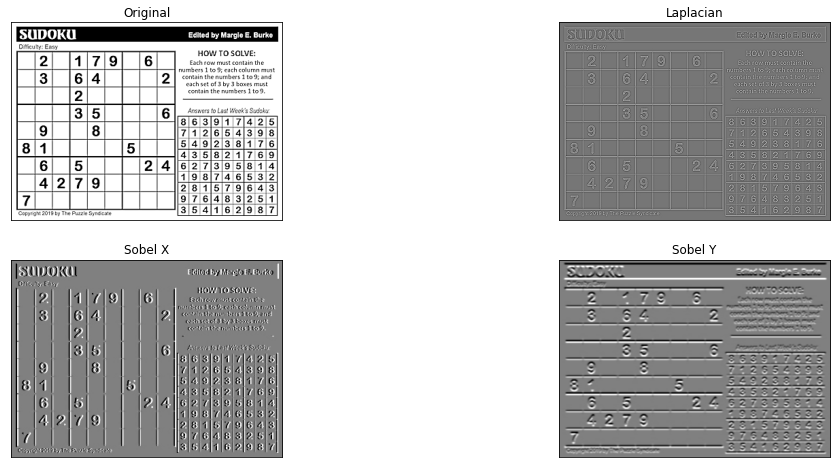

In [2]:
# kernel size must be odd numbers 
img = cv.imread('../Images/newspaper_sudoku.jpeg',0)
laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=1)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)
plt.rcParams['figure.figsize'] = (18.0, 8.0)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

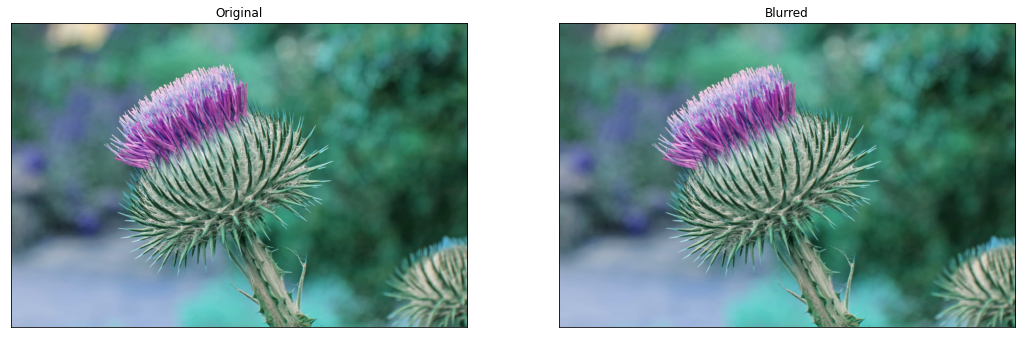

In [3]:
img = cv.imread('../Images/flower-sharp.jpeg')
blur = cv.blur(img,(5,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### Image Segmentation

Any grayscale image can be viewed as a topographic surface where high intensity denotes peaks and hills while low intensity denotes valleys. 

* **The Watershed Algorithm**:
You start filling every isolated valleys (local minima) with different colored water (labels). As the water rises, depending on the peaks (gradients) nearby, water from different valleys, obviously with different colors will start to merge. To avoid that, you build barriers in the locations where water merges. You continue the work of filling water and building barriers until all the peaks are under water. Then the barriers you created gives you the segmentation result. This is the "philosophy" behind the watershed. You can visit the CMM webpage on watershed to understand it with the help of some animations. 
But this approach gives you oversegmented result due to noise or any other irregularities in the image. So OpenCV implemented a marker-based watershed algorithm where you specify which are all valley points are to be merged and which are not. It is an interactive image segmentation. What we do is to give different labels for our object we know. Label the region which we are sure of being the foreground or object with one color (or intensity), label the region which we are sure of being background or non-object with another color and finally the region which we are not sure of anything, label it with 0. That is our marker. Then apply watershed algorithm. Then our marker will be updated with the labels we gave, and the boundaries of objects will have a value of -1.

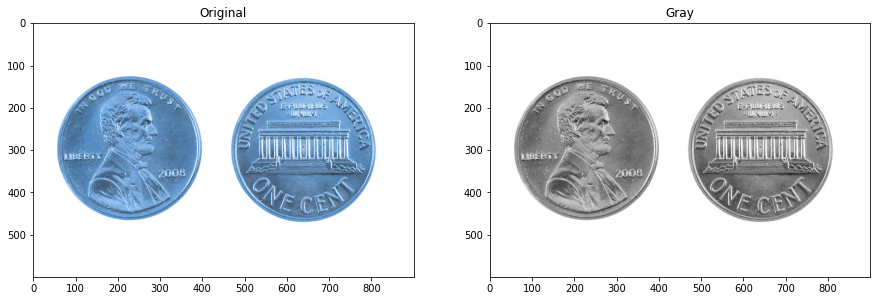

In [8]:

img = cv.imread('../Images/coins_segmentation.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

fig = plt.figure(figsize=(15, 15))
plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray'), plt.title('Original')
plt.subplot(1,2,2),plt.imshow(gray,cmap = 'gray'), plt.title('Gray')
plt.show()

(<AxesSubplot:title={'center':'Finding Unknown Region'}>,
 Text(0.5, 1.0, 'Finding Unknown Region'))

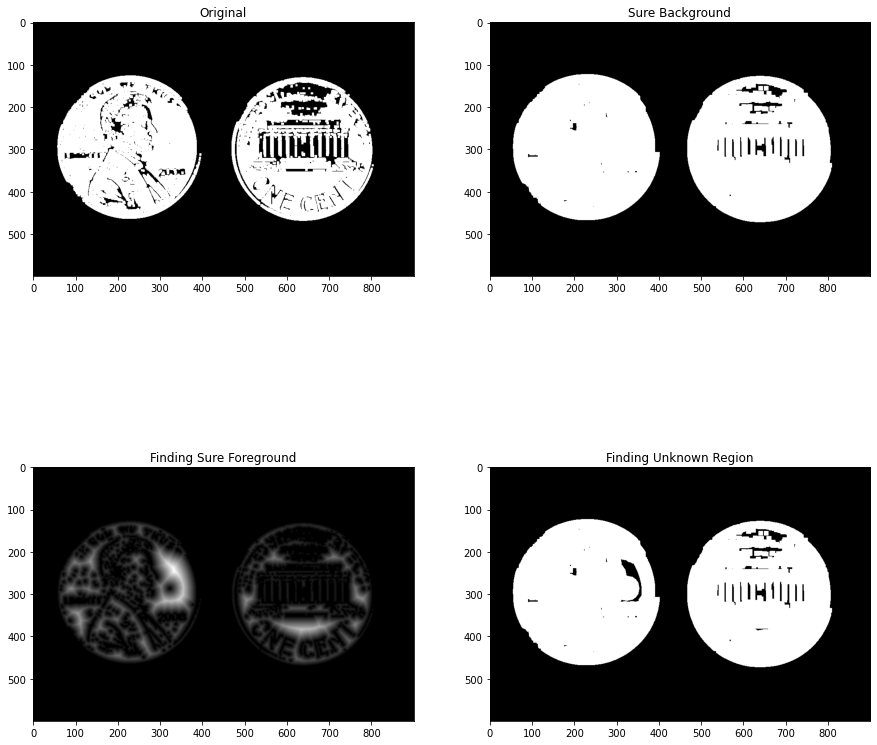

In [12]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

fig = plt.figure(figsize=(15, 15))
plt.subplot(2,2,1),plt.imshow(opening,cmap = 'gray'), plt.title('Original')
plt.subplot(2,2,2),plt.imshow(sure_bg,cmap = 'gray'), plt.title('Sure Background')
plt.subplot(2,2,3),plt.imshow(dist_transform,cmap = 'gray'), plt.title('Finding Sure Foreground')
plt.subplot(2,2,4),plt.imshow(unknown,cmap = 'gray'), plt.title('Finding Unknown Region')

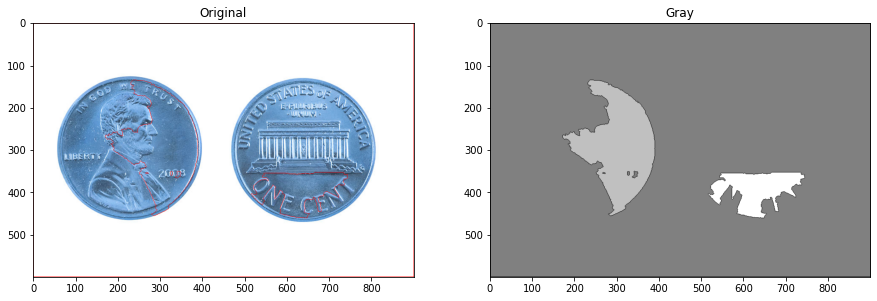

In [13]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

fig = plt.figure(figsize=(15, 15))
plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray'), plt.title('Original')
plt.subplot(1,2,2),plt.imshow(markers,cmap = 'gray'), plt.title('Gray')
plt.show()

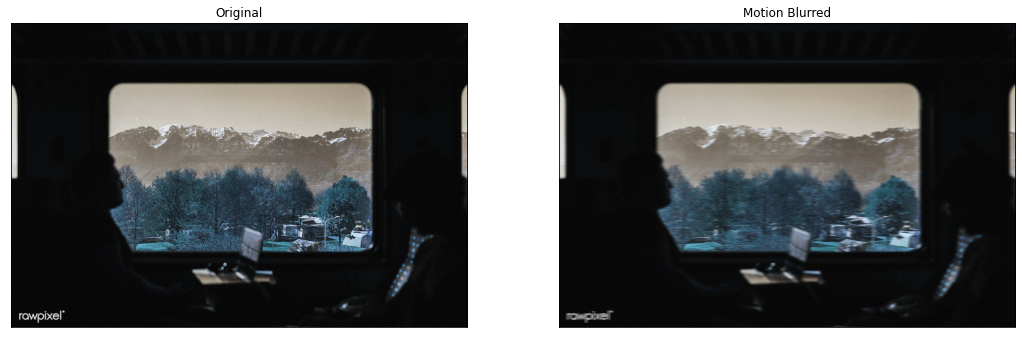

In [18]:
img = cv.imread('../Images/motion_train.jpg')
size = 11

# generating the kernel
kernel_motion_blur = np.zeros((size, size))
kernel_motion_blur[int((size-1)/2), :] = np.ones(size)
kernel_motion_blur = kernel_motion_blur / size

# applying the kernel to the input image
output = cv.filter2D(img, -1, kernel_motion_blur)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output),plt.title('Motion Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### Morphological Image Processing
Morphological image processing basically deals with modifying geometric structures in the image.
These operations are primarily defined for binary images, but we can also use them
on grayscale images. 

Erosion and dilation are morphological image processing operations. Erosion basically strips out the outermost layer of pixels in a structure, where as dilation adds an extra layer of pixels on a structure

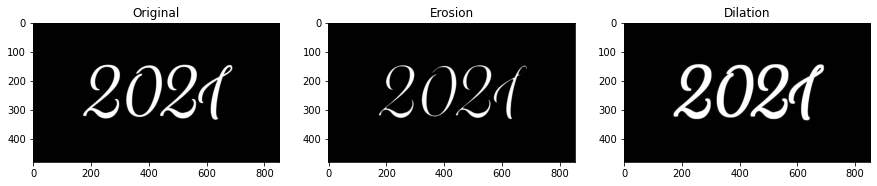

In [43]:
img = cv.imread('../Images/2021.jpg')
kernel = np.ones((5,5), np.uint8)
img_erosion = cv.erode(img, kernel, iterations=1)
img_dilation = cv.dilate(img, kernel, iterations=1)

fig = plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1), plt.imshow(img),plt.title('Original')
plt.subplot(1, 3, 2),plt.imshow(img_erosion),plt.title('Erosion')
plt.subplot(1, 3, 3),plt.imshow(img_dilation),plt.title('Dilation')
plt.show()

In [66]:
# Rectangular Kernel
cv.getStructuringElement(cv.MORPH_RECT,(5,5))


array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [61]:
# Elliptical Kernel
cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))


array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [62]:

# Cross-shaped Kernel
cv.getStructuringElement(cv.MORPH_CROSS,(5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

### Detecting Circles and Lines

([], <matplotlib.image.AxesImage at 0x1479f55d0>, Text(0.5, 1.0, 'Original'))

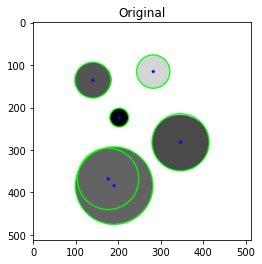

In [87]:
img = cv.imread('../Images/circles.jpeg',0)
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
plt.plot(), plt.imshow(cimg),plt.title('Original')



([], <matplotlib.image.AxesImage at 0x147f39f50>, Text(0.5, 1.0, 'Original'))

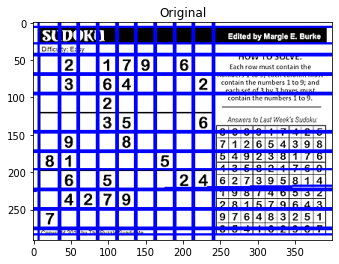

In [89]:
img = cv.imread(cv.samples.findFile('../Images/newspaper_sudoku.jpeg'))
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,50,150,apertureSize = 3)
lines = cv.HoughLines(edges,1,np.pi/180,200)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(img,(x1,y1),(x2,y2),(0,0,255),2)
plt.plot(), plt.imshow(img),plt.title('Original')

([], <matplotlib.image.AxesImage at 0x147edad10>, Text(0.5, 1.0, 'Original'))

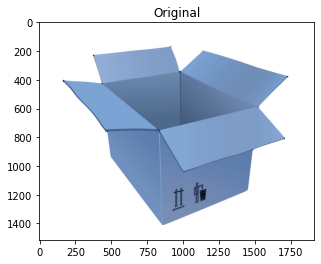

In [92]:
img = cv.imread('../Images/box_image.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray, 4,5, 0.04) # to detect only sharp corners
#dst = cv2.cornerHarris(gray, 14, 5, 0.04) # to detect soft corners
# Result is dilated for marking the corners
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst > 0.01*dst.max()] = [0,0,0]
plt.plot(), plt.imshow(img),plt.title('Original')



## Feature Detection and Description

### Corner Detection

* Harris Corner Detection Algorithm

([], <matplotlib.image.AxesImage at 0x14243b710>, Text(0.5, 1.0, 'Original'))

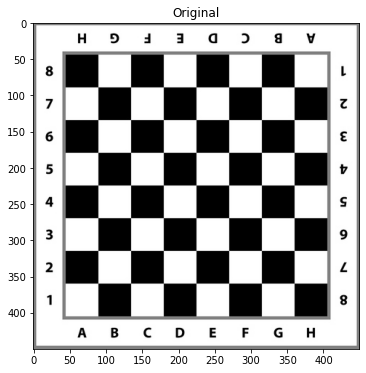

In [10]:
import numpy as np
import cv2 as cv
filename = '../Images/chessboard_corners.jpg'
img = cv.imread(filename)

fig = plt.figure(figsize=(6, 6))
plt.plot(), plt.imshow(img),plt.title('Original')

([],
 Text(0.5, 1.0, 'Corner Detection'))

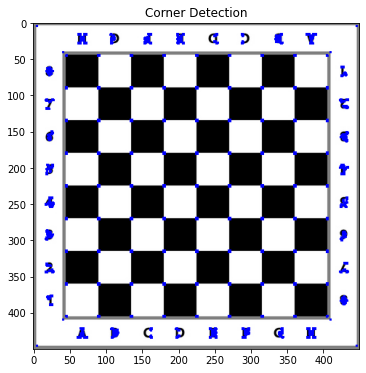

In [11]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

fig = plt.figure(figsize=(6,6))
plt.plot(), plt.imshow(img),plt.title('Corner Detection')

### Feature Matching

In [13]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('../Images/interpol-logo.jpg',cv.IMREAD_GRAYSCALE) 
img2 = cv.imread('../Images/interpol_file.jpg',cv.IMREAD_GRAYSCALE)
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

([],
 Text(0.5, 1.0, 'Query Image'))

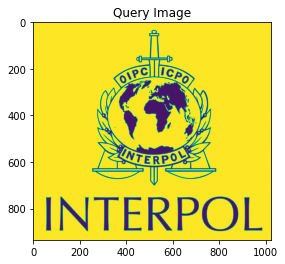

In [25]:
plt.plot(), plt.imshow(img1),plt.title('Query Image')

([],
 Text(0.5, 1.0, 'Search Image'))

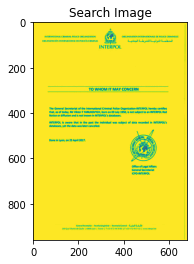

In [26]:
plt.plot(), plt.imshow(img2),plt.title('Search Image')

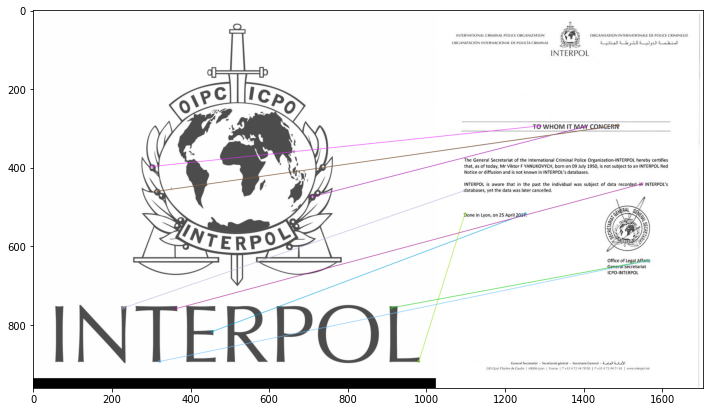

(<matplotlib.image.AxesImage at 0x14603e990>, None)

In [15]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
fig = plt.figure(figsize=(12, 12))
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

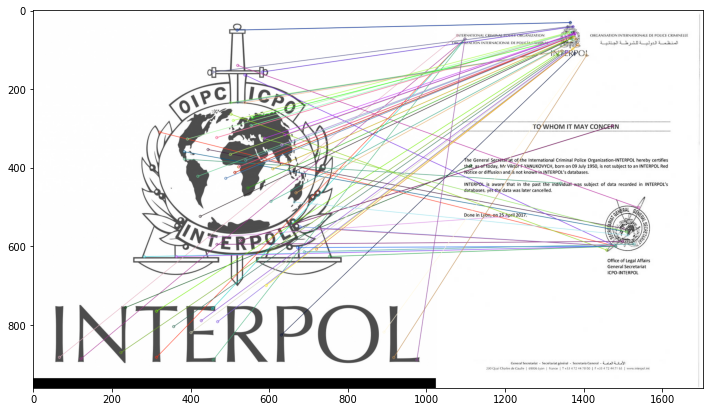

(<matplotlib.image.AxesImage at 0x1460bda10>, None)

In [17]:
img1 = cv.imread('../Images/interpol-logo.jpg',cv.IMREAD_GRAYSCALE) 
img2 = cv.imread('../Images/interpol_file.jpg',cv.IMREAD_GRAYSCALE) 

# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
fig = plt.figure(figsize=(12, 12))
plt.imshow(img3),plt.show()